# Analysis scripts of cloud adjustments and feedbacks in CMIP5/6

Generates Figure 1-4, 8-9 in main text and Supplemental Figure S1-S4

Data sources:

* Regression-based forcing estimates, using years 1-150 of abrupt-4XCO2 simulations, for 24 CMIP5 models and 31 CMIP6 models from [Zelinka et al 2020](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2019GL085782).
* Cloud feedbacks (net, LW and SW) for 24 CMIP5 models and 31 CMIP6 models from [Zelinka et al 2020](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2019GL085782). 
* Regression-based forcing estimates, using years 1-20 of abrupt-4XCO2 simulations, for 24 CMIP5 models and 29 CMIP6 models from [Dong et al 2020](https://journals.ametsoc.org/view/journals/clim/33/18/jcliD191011.xml).    
* Fixed-SST forcing estimates for 13 CMIP5 models from [Kamae et al 2012](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2012GL054275).
* Fixed-SST forcing estimates for 17 CMIP6 models from [Smith et al 2020](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2012GL054275)
* Estimates of the CRE response to CO$_2$ forcing for 13 CMIP5 models from [Kamae et al 2012](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2012GL054275). Note that the CRE response is not equivalent to the cloud adjustment to the forcing as it does not account for cloud masking.
* Estimates of the cloud adjustment to the forcing for six CMIP5 models (CanESM2, CCSM4, HadGEM2-A, IPSL-CM5A-LR, MIROC5 and MRI-CGCM3) are calculated following the procedure in [Zelinka et al 2013](https://journals.ametsoc.org/view/journals/clim/26/14/jcli-d-12-00555.1.xml). These are the models which ran fixed-SST simulations with the ISCCP simulator.
* IRF estimates for five CMIP5 models from [Chung and Soden 2015](https://iopscience.iop.org/article/10.1088/1748-9326/10/7/074004) and for 11 CMIP5 models from [Zhang and Huang 2014](https://journals.ametsoc.org/view/journals/clim/27/7/jcli-d-13-00535.1.xml). The former are obtained using the double-call method, while the latter (IRF2) are obtained using a method proposed by [Huang 2013](https://journals.ametsoc.org/view/journals/clim/26/19/jcli-d-13-00025.1.xml). [Chung and Soden 2015](https://iopscience.iop.org/article/10.1088/1748-9326/10/7/074004) suggest caution when using kernel-based approaches, like that of [Zhang and Huang 2014](https://journals.ametsoc.org/view/journals/clim/27/7/jcli-d-13-00535.1.xml), but we have included the 11 estimates for a larger sample size.
* Estimates of the cloud adjustments to the forcing for 16 CMIP6 models from [Smith et al 2020](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2012GL054275), including 10 CMIP6 models which ran fixed-SST simulations with the ISCCP simulator. Note that we have calculated the cloud adjustment for the MIROC6 model using the [Zelinka et al 2013](https://journals.ametsoc.org/view/journals/clim/26/14/jcli-d-12-00555.1.xml) method, which was not included in [Smith et al 2020](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2012GL054275).
* Estimates of the IRF for 16 CMIP6 models from [Smith et al 2020](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2012GL054275), where the IRF was calculated as a residual between the total forcing and the total adjustment.
* Cloud adjustments in aquaplanet simulations with seven CMIP6 models, calculated following the procedure in [Zelinka et al 2013](https://journals.ametsoc.org/view/journals/clim/26/14/jcli-d-12-00555.1.xml). 
* Meteorological cloud radiative kernels from [Myers et al 2021](https://www.nature.com/articles/s41558-021-01039-0) based on the Cloud Controlling Factor (CCF) analysis developed by [Scott et al 2020](https://journals.ametsoc.org/view/journals/clim/33/18/jcliD191028.xml) for five CMIP5 models and seven CMIP6 models. This includes a new CCF kernel we have calculated for the CESM2 model as part of this analysis. The required meteorological data for the CCF analysis were also downloaded for each model

In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as ss
import pandas as pd

First load data:

In [2]:
CMIP5 = pd.read_table('new_CMIP5_data.txt',delimiter='\t',skiprows=9,header = 0)
CMIP5

/home/nick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,MODEL,F_150,F_20,F_fix,Lambda_CL,Lambda_LWCL,Lambda_SWCL,DeltaCRE,netClAdj,SWClAdj,LWClAdj,IRF,IRF2
0,ACCESS1.0,2.94,3.56,100.00,0.40,0.33,0.07,100.00,100.00,100.00,100.00,100.00,100.00
1,ACCESS1.3,2.88,3.42,100.00,0.59,0.11,0.48,100.00,100.00,100.00,100.00,100.00,100.00
2,BCC-CSM1.1,3.24,3.78,100.00,0.23,0.38,-0.15,100.00,100.00,100.00,100.00,100.00,100.00
3,BCC-CSM1.1-M,3.43,3.85,100.00,0.34,0.36,-0.02,100.00,100.00,100.00,100.00,100.00,100.00
4,CanESM2,3.81,4.18,3.67,0.45,0.74,-0.29,-0.02,0.63,0.53,0.10,2.65,2.87
5,CCSM4,3.48,4.08,4.42,0.18,0.26,-0.09,0.19,0.96,0.86,0.10,100.00,2.76
6,CNRM-CM5,3.69,3.58,3.93,0.10,0.31,-0.20,-0.00,100.00,100.00,100.00,100.00,100.00
7,CSIRO-Mk3,2.60,3.55,3.10,0.59,0.04,0.55,-0.73,100.00,100.00,100.00,100.00,2.87
8,GFDL-CM3,3.01,3.70,100.00,0.83,0.23,0.60,100.00,100.00,100.00,100.00,100.00,2.45
9,GFDL-ESM2G,2.99,3.50,100.00,0.18,0.58,-0.40,100.00,100.00,100.00,100.00,100.00,100.00


In [3]:
CMIP6 = pd.read_table('new_CMIP6_data.txt',delimiter='\t',skiprows=9,header = 0)
CMIP6

/home/nick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,MODEL,F_150,F_20,F_fix,Lambda_CL,Lambda_LWCL,Lambda_SWCL,netClAdj,SWClAdj,LWClAdj,IRF
0,ACCESS-CM2,3.43,4.12,3.97,0.76,-0.20,0.96,0.70,100.00,100.00,2.16
1,ACCESS-ESM1.5,2.83,3.50,100.00,0.56,0.13,0.43,100.00,100.00,100.00,100.00
2,BCC-CSM2-MR,3.11,3.59,100.00,0.51,0.35,0.16,100.00,100.00,100.00,100.00
3,BCC-ESM,3.01,3.47,100.00,0.52,0.50,0.02,100.00,100.00,100.00,100.00
4,CAMS-CSM1.0,4.17,4.33,100.00,-0.36,0.36,-0.72,100.00,100.00,100.00,100.00
5,CESM2-WACCM,3.30,4.05,100.00,1.17,0.12,1.05,100.00,100.00,100.00,100.00
6,CESM2,3.27,4.18,4.45,0.96,0.17,0.79,1.07,1.19,0.13,2.25
7,CNRM-CM6.1,3.64,3.95,4.00,0.55,0.57,-0.02,0.22,0.26,-0.13,2.16
8,CNRM-ESM2.1,2.97,2.79,3.96,0.56,0.53,0.03,0.12,0.13,-0.05,2.80
9,CanESM5,3.68,3.75,3.80,0.80,0.82,-0.02,0.47,0.71,-0.20,2.82


### Start with forcing relationships

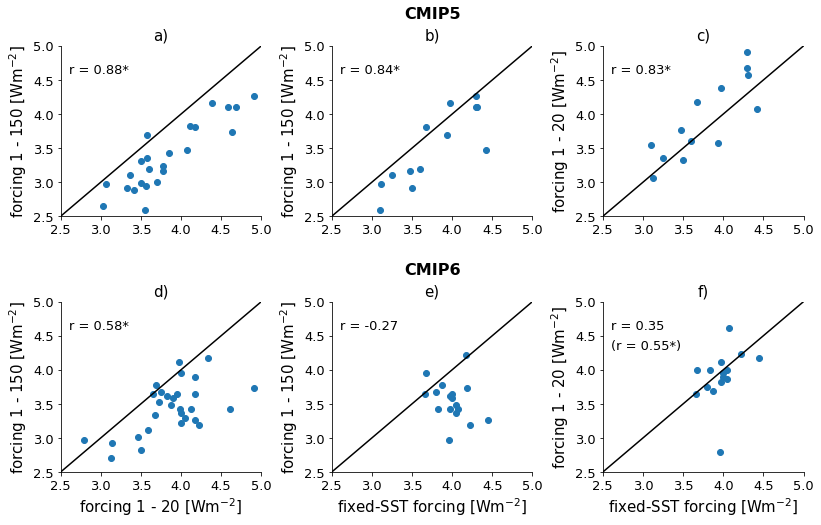

In [4]:
#First plot forcing comparison
fig = plt.figure( figsize = (12, 8) )
plt.subplots_adjust(left = 0.12, right = 0.98, bottom = 0.16, top = 0.9, wspace = 0.35, hspace = 0.5)

x = np.linspace(0., 10., 10) #for plotting 1:1 lines

titles = ["a)", "b)", "c)", "d)", "e)", "f)", "g)"]

for i in range( 6 ):
    ax = plt.subplot(2, 3, i + 1)
    plt.title(titles[i] , fontsize = 15)

    if i == 0 or i == 3:
        key1 = "F_20"
        key2 = "F_150"
    elif i == 1 or i == 4:
        key1 = "F_fix"
        key2 = "F_150"
    elif i == 2 or i == 5:
        key1 = "F_fix"
        key2 = "F_20"
        
    #need to make masked arrays, don't know a better way of doing the linear regressions
    if i < 3:
        x1 = np.ma.masked_where(CMIP5[key1] > 10., CMIP5[key1])
        y1 = np.ma.masked_where(CMIP5[key1] > 10., CMIP5[key2])
    else:
        x1 = np.ma.masked_where(CMIP6[key1] > 10., CMIP6[key1])
        y1 = np.ma.masked_where(CMIP6[key1] > 10., CMIP6[key2])   
        if max(y1) > 10.:
            #when both arrays mismatched
            y1 = np.ma.masked_where(y1 > 10., y1) 
            x1 = np.ma.masked_where(y1 > 10., x1) 
            
    plt.plot(x1, y1, 'o') 
    corr, pval = ss.mstats.linregress(x1, y1)[2:4]

    plt.plot(x, x, 'k')
    plt.ylim([2.5, 5.])
    plt.xlim([2.5, 5.])
    
    if pval < 0.05:
        plt.text( 2.6, 4.6, 'r = %0.2f*' % corr, fontsize = 13 )
    else:
        plt.text( 2.6, 4.6, 'r = %0.2f' % corr, fontsize = 13 )
        
    if i == 5:
        #do CMIP6 correlations w/out CNRM-ESM2.1, which was set up incorrectly
        x2 = np.ma.masked_where(y1 < 3., x1)
        y2 = np.ma.masked_where(y1 < 3., y1)
        corr2, pval2 = ss.mstats.linregress(x2, y2)[2:4]
        if pval2 < 0.05:
            plt.text( 2.6, 4.3, '(r = %0.2f*)' % corr2, fontsize = 13 )
        else:
            plt.text( 2.6, 4.3, '(r = %0.2f)' % corr2, fontsize = 13 )
            
    if i == 0 or i == 1 or i == 3 or i == 4:
        plt.ylabel("forcing 1 - 150 [Wm$^{-2}$]", fontsize = 15)
    else:
        plt.ylabel("forcing 1 - 20 [Wm$^{-2}$]", fontsize = 15)
    if i == 3:
        plt.xlabel("forcing 1 - 20 [Wm$^{-2}$]", fontsize = 15)
    elif i > 3:
        plt.xlabel("fixed-SST forcing [Wm$^{-2}$]", fontsize = 15)
 
    
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    
    if i == 1:
        plt.text(3.4, 5.4, "CMIP5", fontsize = 16, weight = "bold")
    if i == 4:
        plt.text(3.4, 5.4, "CMIP6", fontsize = 16, weight = "bold")
        
plt.savefig("Forcing_comparison.png")
plt.savefig("Forcing_comparison.pdf")

### Now onto relationships with cloud feedbacks

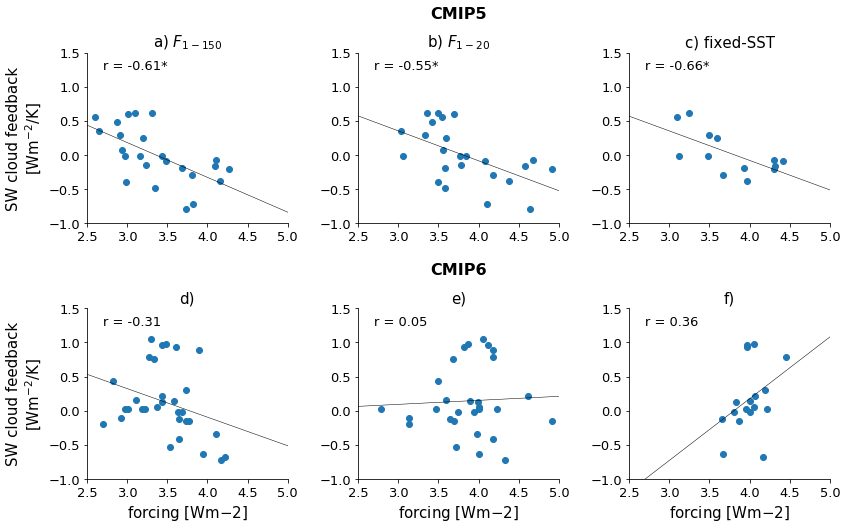

In [5]:
fig = plt.figure( figsize = (12, 8) )
plt.subplots_adjust(left = 0.12, right = 0.98, bottom = 0.16, top = 0.9, wspace = 0.35, hspace = 0.5)

titles = ["a) $F_{1-150}$", "b) $F_{1-20}$", "c) fixed-SST", "d)", "e)", "f)", "g)"]

x = np.linspace(-10., 10., 10) #for plotting regression lines

for i in range( 6 ):
    ax = plt.subplot(2, 3, 1 + i)
    plt.title(titles[i], fontsize = 15  )

    key2 = "Lambda_SWCL"
    if i == 0 or i == 3:
        key1 = "F_150"
    elif i == 1 or i == 4:
        key1 = "F_20"
    else:
        key1 = "F_fix"
    
    if i < 3:
        x1 = np.ma.masked_where(CMIP5[key1] > 10., CMIP5[key1])
        y1 = np.ma.masked_where(CMIP5[key1] > 10., CMIP5[key2])
    else:
        x1 = np.ma.masked_where(CMIP6[key1] > 10., CMIP6[key1])
        y1 = np.ma.masked_where(CMIP6[key1] > 10., CMIP6[key2])   
    if max(y1) > 10.:
        #when both arrays mismatched
        y1 = np.ma.masked_where(y1 > 10., y1) 
        x1 = np.ma.masked_where(y1 > 10., x1)     
            
    plt.plot(x1, y1, 'o') 
    slope, intercept, corr, pval = ss.mstats.linregress(x1, y1)[:4]

    plt.plot(x, slope * x + intercept, 'k', linewidth = 0.5)
    if pval < 0.05:
        plt.text( 2.7, 1.25, 'r = %0.2f*' % corr, fontsize = 13 )
    else:
        plt.text( 2.7, 1.25, 'r = %0.2f' % corr, fontsize = 13 )
       
    
    if i == 0 or i == 3:
        plt.ylabel("SW cloud feedback\n[Wm$^{-2}$/K]", fontsize = 15  )
    if i > 2:
        plt.xlabel("forcing [Wm${-2}$]", fontsize = 15  )

    plt.xlim([2.5, 5.])
    plt.ylim([-1., 1.5])
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)

    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')


    if i == 1:
        plt.text(3.4, 2., "CMIP5", fontsize = 16, weight = "bold")
    if i == 4:
        plt.text(3.4, 2., "CMIP6", fontsize = 16, weight = "bold")
        
plt.savefig("Forcing_SW_CL_Feedback_CMIP5_6.png")
plt.savefig("Forcing_SW_CL_Feedback_CMIP5_6.pdf")
       

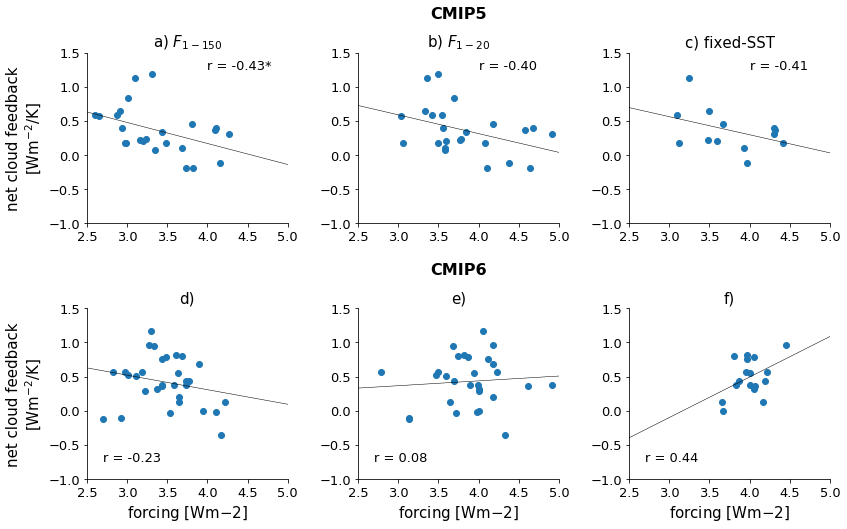

In [6]:
fig = plt.figure( figsize = (12, 8) )
plt.subplots_adjust(left = 0.12, right = 0.98, bottom = 0.16, top = 0.9, wspace = 0.35, hspace = 0.5)

titles = ["a) $F_{1-150}$", "b) $F_{1-20}$", "c) fixed-SST", "d)", "e)", "f)", "g)"]

x = np.linspace(-10., 10., 10) #for plotting regression lines

for i in range( 6 ):
    ax = plt.subplot(2, 3, 1 + i)
    plt.title(titles[i], fontsize = 15  )

    key2 = "Lambda_CL"
    if i == 0 or i == 3:
        key1 = "F_150"
    elif i == 1 or i == 4:
        key1 = "F_20"
    else:
        key1 = "F_fix"
    
    if i < 3:
        x1 = np.ma.masked_where(CMIP5[key1] > 10., CMIP5[key1])
        y1 = np.ma.masked_where(CMIP5[key1] > 10., CMIP5[key2])
    else:
        x1 = np.ma.masked_where(CMIP6[key1] > 10., CMIP6[key1])
        y1 = np.ma.masked_where(CMIP6[key1] > 10., CMIP6[key2])  
    if max(y1) > 10.:
        #when both arrays mismatched
        y1 = np.ma.masked_where(y1 > 10., y1) 
        x1 = np.ma.masked_where(y1 > 10., x1)  
             
    plt.plot(x1, y1, 'o') 
    slope, intercept, corr, pval = ss.mstats.linregress(x1, y1)[:4]

    plt.plot(x, slope * x + intercept, 'k', linewidth = 0.5)
    
    if i < 3:
        if pval < 0.05:
            plt.text( 4.0, 1.25, 'r = %0.2f*' % corr, fontsize = 13 )
        else:
            plt.text( 4.0, 1.25, 'r = %0.2f' % corr, fontsize = 13 )
    else:
        if pval < 0.05:
            plt.text( 2.7, -0.75, 'r = %0.2f*' % corr, fontsize = 13 )
        else:
            plt.text( 2.7, -0.75, 'r = %0.2f' % corr, fontsize = 13 )
    
    if i == 0 or i == 3:
        plt.ylabel("net cloud feedback\n[Wm$^{-2}$/K]", fontsize = 15  )
    if i > 2:
        plt.xlabel("forcing [Wm${-2}$]", fontsize = 15  )

    plt.xlim([2.5, 5.])
    plt.ylim([-1., 1.5])
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)

    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')


    if i == 1:
        plt.text(3.4, 2., "CMIP5", fontsize = 16, weight = "bold")
    if i == 4:
        plt.text(3.4, 2., "CMIP6", fontsize = 16, weight = "bold")
       
plt.savefig("Forcing_CL_Feedback_CMIP5_6.png")
plt.savefig("Forcing_CL_Feedback_CMIP5_6.pdf")

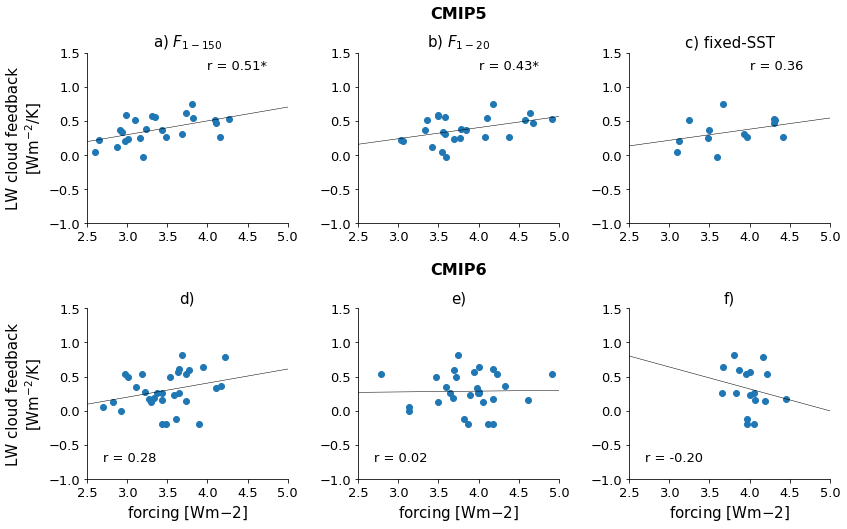

In [7]:
fig = plt.figure( figsize = (12, 8) )
plt.subplots_adjust(left = 0.12, right = 0.98, bottom = 0.16, top = 0.9, wspace = 0.35, hspace = 0.5)

titles = ["a) $F_{1-150}$", "b) $F_{1-20}$", "c) fixed-SST", "d)", "e)", "f)", "g)"]

x = np.linspace(-10., 10., 10) #for plotting regression lines

for i in range( 6 ):
    ax = plt.subplot(2, 3, 1 + i)
    plt.title(titles[i], fontsize = 15  )

    key2 = "Lambda_LWCL"
    if i == 0 or i == 3:
        key1 = "F_150"
    elif i == 1 or i == 4:
        key1 = "F_20"
    else:
        key1 = "F_fix"
    
    if i < 3:
        x1 = np.ma.masked_where(CMIP5[key1] > 10., CMIP5[key1])
        y1 = np.ma.masked_where(CMIP5[key1] > 10., CMIP5[key2])
    else:
        x1 = np.ma.masked_where(CMIP6[key1] > 10., CMIP6[key1])
        y1 = np.ma.masked_where(CMIP6[key1] > 10., CMIP6[key2])   
    if max(y1) > 10.:
        #when both arrays mismatched
        y1 = np.ma.masked_where(y1 > 10., y1) 
        x1 = np.ma.masked_where(y1 > 10., x1)  
        
    plt.plot(x1, y1, 'o') 
    slope, intercept, corr, pval = ss.mstats.linregress(x1, y1)[:4]

    plt.plot(x, slope * x + intercept, 'k', linewidth = 0.5)
    
    if i < 3:
        if pval < 0.05:
            plt.text( 4.0, 1.25, 'r = %0.2f*' % corr, fontsize = 13 )
        else:
            plt.text( 4.0, 1.25, 'r = %0.2f' % corr, fontsize = 13 )
    else:
        if pval < 0.05:
            plt.text( 2.7, -0.75, 'r = %0.2f*' % corr, fontsize = 13 )
        else:
            plt.text( 2.7, -0.75, 'r = %0.2f' % corr, fontsize = 13 )
    
    if i == 0 or i == 3:
        plt.ylabel("LW cloud feedback\n[Wm$^{-2}$/K]", fontsize = 15  )
    if i > 2:
        plt.xlabel("forcing [Wm${-2}$]", fontsize = 15  )

    plt.xlim([2.5, 5.])
    plt.ylim([-1., 1.5])
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)

    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')


    if i == 1:
        plt.text(3.4, 2., "CMIP5", fontsize = 16, weight = "bold")
    if i == 4:
        plt.text(3.4, 2., "CMIP6", fontsize = 16, weight = "bold")
       
plt.savefig("Forcing_LW_CL_Feedback_CMIP5_6.png")
plt.savefig("Forcing_LW_CL_Feedback_CMIP5_6.pdf")

### Cloud adjustments and forcing/cloud feedbacks

In [8]:
# These are the "Tableau 20" colors as RGB.    
cs = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(cs)):    
    r, g, b = cs[i]    
    cs[i] = (r / 255., g / 255., b / 255.) 

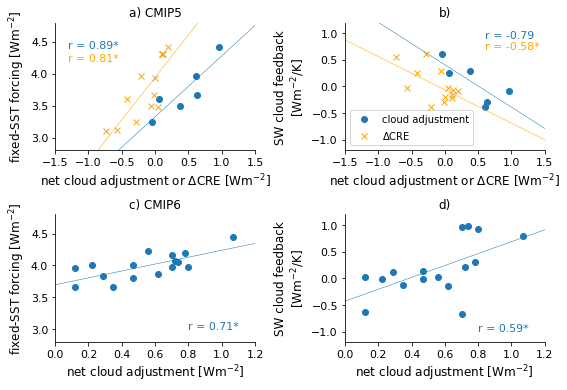

In [9]:
fig = plt.figure( figsize = (8, 6) )
plt.subplots_adjust(left = 0.12, right = 0.97, bottom = 0.16, top = 0.9, wspace = 0.45, hspace = 0.5)

titles = ["a) CMIP5", "b)", "c) CMIP6", "d)"]
for i in range( 4 ):
    ax = plt.subplot(2, 2, 1 + i)
    plt.title(titles[i], fontsize = 12 )
    
    key1 = "netClAdj"
    if i == 0 or i == 2:
        key2 = "F_fix"
    elif i == 1 or i == 3:
        key2 = "Lambda_SWCL"
    if i < 2:
        key3 = "DeltaCRE"
        x1 = np.ma.masked_where(CMIP5[key1] > 10., CMIP5[key1])
        y1 = np.ma.masked_where(CMIP5[key1] > 10., CMIP5[key2])
        x2 = np.ma.masked_where(CMIP5[key3] > 10., CMIP5[key3])
        y2 = np.ma.masked_where(CMIP5[key3] > 10., CMIP5[key2])
    else:
        x1 = np.ma.masked_where(CMIP6[key1] > 10., CMIP6[key1])
        y1 = np.ma.masked_where(CMIP6[key1] > 10., CMIP6[key2])   
        
    if max(y1) > 10.:
        #when both arrays mismatched
        y1 = np.ma.masked_where(y1 > 10., y1) 
        x1 = np.ma.masked_where(y1 > 10., x1)  
 
    plt.plot(x1, y1, 'o', color = cs[0]) 
    if i < 2:
        plt.plot(x2, y2, 'x', color = 'orange') 
        slope2, intercept2, corr2, pval2 = ss.mstats.linregress(x2, y2)[:4]
        plt.plot(x, slope2 * x + intercept2, color = 'orange', linewidth = 0.5)
        plt.xlabel("net cloud adjustment or $\Delta$CRE [Wm$^{-2}$]", fontsize = 12 )
    else:
        plt.xlabel("net cloud adjustment [Wm$^{-2}$]", fontsize = 12 )
    slope, intercept, corr, pval = ss.mstats.linregress(x1, y1)[:4]
    plt.plot(x, slope * x + intercept, color = cs[0], linewidth = 0.5)

    if i < 2:
        plt.xlim([-1.5, 1.5])
    else:
        plt.xlim([0., 1.2])
    if i %2 == 1:
        plt.ylim([-1.2, 1.2])
        plt.ylabel("SW cloud feedback\n[Wm$^{-2}$/K]", fontsize = 12 )
    else:
        plt.ylim([2.8, 4.8])
        plt.ylabel("fixed-SST forcing [Wm$^{-2}$]", fontsize = 12 )

    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.xticks(fontsize = 11)
    plt.yticks(fontsize = 11) 
    if i == 0:
        if pval < 0.05:
            plt.text( -1.3, 4.4, 'r = %0.2f*' % corr,  fontsize = 11, color = cs[0] )
        else:
            plt.text( -1.3, 4.4, 'r = %0.2f' % corr,  fontsize = 11, color = cs[0] )

        if pval2 < 0.05:
            plt.text( -1.3, 4.2, 'r = %0.2f*' % corr2,  fontsize = 11, color = 'orange' )
        else:
            plt.text( -1.3, 4.2, 'r = %0.2f' % corr2,  fontsize = 11, color = 'orange' )
    elif i == 1:
        if pval < 0.05:
            plt.text( 0.6, 0.9, 'r = %0.2f*' % corr,  fontsize = 11, color = cs[0] )
        else:
            plt.text( 0.6, 0.9, 'r = %0.2f' % corr,  fontsize = 11, color = cs[0] )

        if pval2 < 0.05:
            plt.text( 0.6, 0.7, 'r = %0.2f*' % corr2,  fontsize = 11, color = 'orange' )
        else:
            plt.text( 0.6, 0.7, 'r = %0.2f' % corr2,  fontsize = 11, color = 'orange' )
        plt.legend(["cloud adjustment", "$\Delta$CRE"], loc = "lower left", frameon= True, fontsize = 10)
    elif i == 2:
        if pval < 0.05:
            plt.text( 0.8, 3., 'r = %0.2f*' % corr,  fontsize = 11, color = cs[0] )
        else:
            plt.text( 0.8, 3., 'r = %0.2f' % corr,  fontsize = 11, color = cs[0] )
    elif i == 3:
        if pval < 0.05:
            plt.text( 0.8, -1., 'r = %0.2f*' % corr,  fontsize = 11, color = cs[0] )
        else:
            plt.text( 0.8, -1., 'r = %0.2f' % corr,  fontsize = 11, color = cs[0] )
            
plt.savefig("Cloud_adjustment_forcing_feedback.png")
plt.savefig("Cloud_adjustment_forcing_feedback.pdf")

### Check IRF

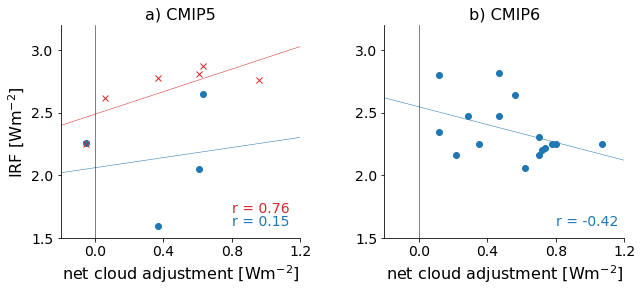

In [10]:
fig = plt.figure( figsize = (9, 4) )
plt.subplots_adjust(left = 0.1, right = 0.97, bottom = 0.16, top = 0.9, wspace = 0.35, hspace = 0.5)

titles = ["a) CMIP5", "b) CMIP6"]
for i in range( 2 ):
    ax = plt.subplot(1, 2, 1 + i)
    plt.title(titles[i], fontsize = 16 )
    
    key1 = "netClAdj"
    key2 = "IRF"
    key3 = "IRF2"

    if i == 0:
        x1 = np.ma.masked_where(CMIP5[key1] > 10., CMIP5[key1])
        y1 = np.ma.masked_where(CMIP5[key1] > 10., CMIP5[key2])
        x2 = np.ma.masked_where(CMIP5[key1] > 10., CMIP5[key1])
        y2 = np.ma.masked_where(CMIP5[key1] > 10., CMIP5[key3])
    else:
        x1 = np.ma.masked_where(CMIP6[key1] > 10., CMIP6[key1])
        y1 = np.ma.masked_where(CMIP6[key1] > 10., CMIP6[key2])   
    if np.ma.max(y1) > 10.:
        #when both arrays mismatched
        y1 = np.ma.masked_where(y1 > 10., y1) 
        x1 = np.ma.masked_where(y1 > 10., x1)  
 
    plt.plot( x1, y1, 'o', c = cs[0])
    slope, intercept, corr, pval = ss.mstats.linregress(x1, y1)[:4]
    if pval < 0.05:
        plt.text( 0.8, 1.6, 'r = %0.2f*' % corr,  fontsize = 14, color = cs[0] )
    else:
        plt.text( 0.8, 1.6, 'r = %0.2f' % corr,  fontsize = 14, color = cs[0] )
    if i == 0:
        plt.plot( x2, y2, 'x', c = cs[6])
        slope2, intercept2, corr2, pval2 = ss.mstats.linregress(x2, y2)[:4]
        if pval2 < 0.05:
            plt.text( 0.8, 1.7, 'r = %0.2f*' % corr2,  fontsize = 14, color = cs[6] )
        else:
            plt.text( 0.8, 1.7, 'r = %0.2f' % corr2,  fontsize = 14, color = cs[6] )
        
        #plt.legend(["CS15", "ZH14"], loc = "center right", fontsize = 14)
    plt.plot(x, x * slope + intercept, color = cs[0], linewidth = 0.5)
    if i == 0:
        plt.plot(x, x * slope2 + intercept2, color = cs[6], linewidth = 0.5)

    plt.xlabel("net cloud adjustment [Wm$^{-2}$]", fontsize = 16)
    if i == 0:
        plt.ylabel("IRF [Wm$^{-2}$]", fontsize = 16 )
    plt.xlim([-0.2, 1.2])
    plt.ylim([1.5, 3.2])
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.xticks([0., 0.4, 0.8, 1.2], fontsize = 14)
    plt.yticks([1.5, 2., 2.5, 3.], fontsize = 14)

    plt.axvline(x = 0, color = 'k', linewidth = 0.5)
    plt.axhline(y = 0, color = 'k', linewidth = 0.5)
    
    plt.savefig("Cloud_Adjustment_IRF_comp.pdf")
    plt.savefig("Cloud_Adjustment_IRF_comp.png")



Extra figure on adjustments vs sw feedback for supplement

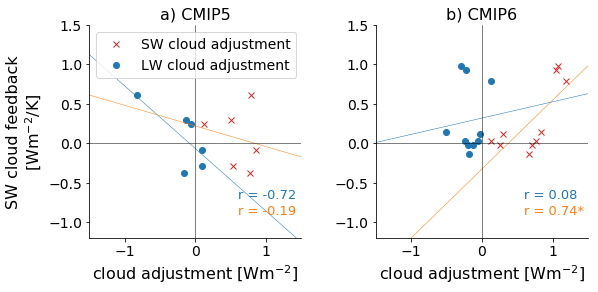

In [11]:
fig = plt.figure( figsize = (9, 4) )
plt.subplots_adjust(left = 0.2, right = 0.97, bottom = 0.16, top = 0.9, wspace = 0.35, hspace = 0.5)

for i in range( 2 ):
    ax = plt.subplot(1, 2, i + 1)
    if i == 0:
        plt.title("a) CMIP5", fontsize = 16 )
    else:
        plt.title("b) CMIP6", fontsize = 16 )

    key1 = "SWClAdj"
    key2 = "LWClAdj"
    key3 = "Lambda_SWCL"

    if i == 0:
        x1 = np.ma.masked_where(CMIP5[key1] > 10., CMIP5[key1])
        x2 = np.ma.masked_where(CMIP5[key2] > 10., CMIP5[key2])
        y1 = np.ma.masked_where(CMIP5[key1] > 10., CMIP5[key3])
    else:
        x1 = np.ma.masked_where(CMIP6[key1] > 10., CMIP6[key1])
        x2 = np.ma.masked_where(CMIP6[key2] > 10., CMIP6[key2])
        y1 = np.ma.masked_where(CMIP6[key1] > 10., CMIP6[key3])
    plt.plot( x1, y1, 'x', c = cs[6])
    plt.plot( x2, y1, 'o', c = cs[0])

    if i == 0:
        plt.legend(["SW cloud adjustment", "LW cloud adjustment"], fontsize = 14, loc = "upper left")

    pval = ss.mstats.linregress(x1, y1)[3]
    if pval < 0.05:
        plt.text( 0.6, -0.9, 'r = %0.2f*' % np.ma.corrcoef(x1, y1)[0, 1 ],  fontsize = 13, color = cs[2] )
    else:
        plt.text( 0.6, -0.9, 'r = %0.2f' % np.ma.corrcoef(x1, y1)[0, 1 ],  fontsize = 13, color = cs[2] )

    pval = ss.mstats.linregress(x2, y1)[3]
    if pval < 0.05:
        plt.text( 0.6, -0.7, 'r = %0.2f*' % np.ma.corrcoef(x2, y1)[0, 1 ],  fontsize = 13, color = cs[0] )
    else:
        plt.text( 0.6, -0.7, 'r = %0.2f' % np.ma.corrcoef(x2, y1)[0, 1 ],  fontsize = 13, color = cs[0] )


    slope, inter = ss.mstats.linregress(x1, y1)[:2]
    plt.plot(x, x * slope + inter, color = cs[2], linewidth = 0.5)
    slope, inter = ss.mstats.linregress(x2, y1)[:2]
    plt.plot(x, x * slope + inter, color = cs[0],  linewidth = 0.5)


    plt.xlabel("cloud adjustment [Wm$^{-2}$]", fontsize = 16 )
    if i == 0:
        plt.ylabel("SW cloud feedback\n[Wm$^{-2}$/K]", fontsize = 16 )
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.2, 1.5])
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.xticks([-1., 0., 1.], fontsize = 14)
    plt.yticks(fontsize = 14)

    plt.axvline(x = 0, color = 'k', linewidth = 0.5)
    plt.axhline(y = 0, color = 'k', linewidth = 0.5)


plt.savefig("Cloud_adjustment_feedback_breakdown.png")
plt.savefig("Cloud_adjustment_feedback_breakdown.pdf")

Finally, the plots breaking down the cloud adjustments by cloud height and the results of the CCF analysis. Please contact
Tim Myers (timothy.myers@noaa.gov ) and/or Matt Luongo (mluongo@ucsd.edu) for full details on the CCF analysis.

In [12]:
#load adjustments in tau x lat x lon 
CMIP5_lw_adj = np.load("CMIP5_lw_adj.npy")
CMIP5_sw_adj = np.load("CMIP5_sw_adj.npy")
CMIP5_net_adj = np.load("CMIP5_net_adj.npy")

CMIP6_lw_adj = np.load("CMIP6_lw_adj.npy")
CMIP6_sw_adj = np.load("CMIP6_sw_adj.npy")
CMIP6_net_adj = np.load("CMIP6_net_adj.npy")

In [13]:
lat = np.linspace(-90., 90., 64)
lon = np.linspace(0., 360., 128)
rad_lats = lat * np.pi / 180.
rad_lons = lon * np.pi / 180.
cos_lat = np.cos(rad_lats)

gm_cloud_adjustment_cmip5 = np.sum(CMIP5_net_adj, axis = 1)
gm_cloud_adjustment_cmip5 = np.trapz(np.trapz(gm_cloud_adjustment_cmip5 * cos_lat[np.newaxis, :, np.newaxis], rad_lons, axis = 2), rad_lats, axis = 1) / 4. / np.pi

gm_sw_adjustment_cmip5 = np.sum(CMIP5_sw_adj, axis = 1)
gm_sw_adjustment_cmip5 = np.trapz(np.trapz(gm_sw_adjustment_cmip5 * cos_lat[np.newaxis, :, np.newaxis], rad_lons, axis = 2), rad_lats, axis = 1) / 4. / np.pi

gm_lw_adjustment_cmip5 = np.sum(CMIP5_lw_adj, axis = 1)
gm_lw_adjustment_cmip5 = np.trapz(np.trapz(gm_lw_adjustment_cmip5 * cos_lat[np.newaxis, :, np.newaxis], rad_lons, axis = 2), rad_lats, axis = 1) / 4/ np.pi

gm_cloud_adjustment_cmip6 = np.sum(CMIP6_net_adj, axis = 1)
gm_cloud_adjustment_cmip6 = np.trapz(np.trapz(gm_cloud_adjustment_cmip6 * cos_lat[np.newaxis, :, np.newaxis], rad_lons, axis = 2), rad_lats, axis = 1) / 4. / np.pi

gm_sw_adjustment_cmip6 = np.sum(CMIP6_sw_adj, axis = 1)
gm_sw_adjustment_cmip6 = np.trapz(np.trapz(gm_sw_adjustment_cmip6 * cos_lat[np.newaxis, :, np.newaxis], rad_lons, axis = 2), rad_lats, axis = 1) / 4. / np.pi

gm_lw_adjustment_cmip6 = np.sum(CMIP6_lw_adj, axis = 1)
gm_lw_adjustment_cmip6 = np.trapz(np.trapz(gm_lw_adjustment_cmip6 * cos_lat[np.newaxis, :, np.newaxis], rad_lons, axis = 2), rad_lats, axis = 1) / 4/ np.pi


In [14]:
gm_sw_low_adjustment_cmip5 = np.sum(CMIP5_sw_adj[:, :2], axis = 1)
gm_sw_low_adjustment_cmip5 = np.trapz(np.trapz(gm_sw_low_adjustment_cmip5 * cos_lat[np.newaxis, :, np.newaxis], rad_lons, axis = 2), rad_lats, axis = 1) / 4. / np.pi

gm_sw_med_adjustment_cmip5 = np.sum(CMIP5_sw_adj[:, 2:4], axis = 1)
gm_sw_med_adjustment_cmip5 = np.trapz(np.trapz(gm_sw_med_adjustment_cmip5 * cos_lat[np.newaxis, :, np.newaxis], rad_lons, axis = 2), rad_lats, axis = 1) / 4. / np.pi

gm_sw_high_adjustment_cmip5 = np.sum(CMIP5_sw_adj[:, 4:], axis = 1)
gm_sw_high_adjustment_cmip5 = np.trapz(np.trapz(gm_sw_high_adjustment_cmip5 * cos_lat[np.newaxis, :, np.newaxis], rad_lons, axis = 2), rad_lats, axis = 1) / 4. / np.pi

gm_sw_low_adjustment_cmip6 = np.sum(CMIP6_sw_adj[:, :2], axis = 1)
gm_sw_low_adjustment_cmip6 = np.trapz(np.trapz(gm_sw_low_adjustment_cmip6 * cos_lat[np.newaxis, :, np.newaxis], rad_lons, axis = 2), rad_lats, axis = 1) / 4. / np.pi

gm_sw_med_adjustment_cmip6 = np.sum(CMIP6_sw_adj[:, 2:4], axis = 1)
gm_sw_med_adjustment_cmip6 = np.trapz(np.trapz(gm_sw_med_adjustment_cmip6 * cos_lat[np.newaxis, :, np.newaxis], rad_lons, axis = 2), rad_lats, axis = 1) / 4. / np.pi

gm_sw_high_adjustment_cmip6 = np.sum(CMIP6_sw_adj[:, 4:], axis = 1)
gm_sw_high_adjustment_cmip6 = np.trapz(np.trapz(gm_sw_high_adjustment_cmip6 * cos_lat[np.newaxis, :, np.newaxis], rad_lons, axis = 2), rad_lats, axis = 1) / 4. / np.pi


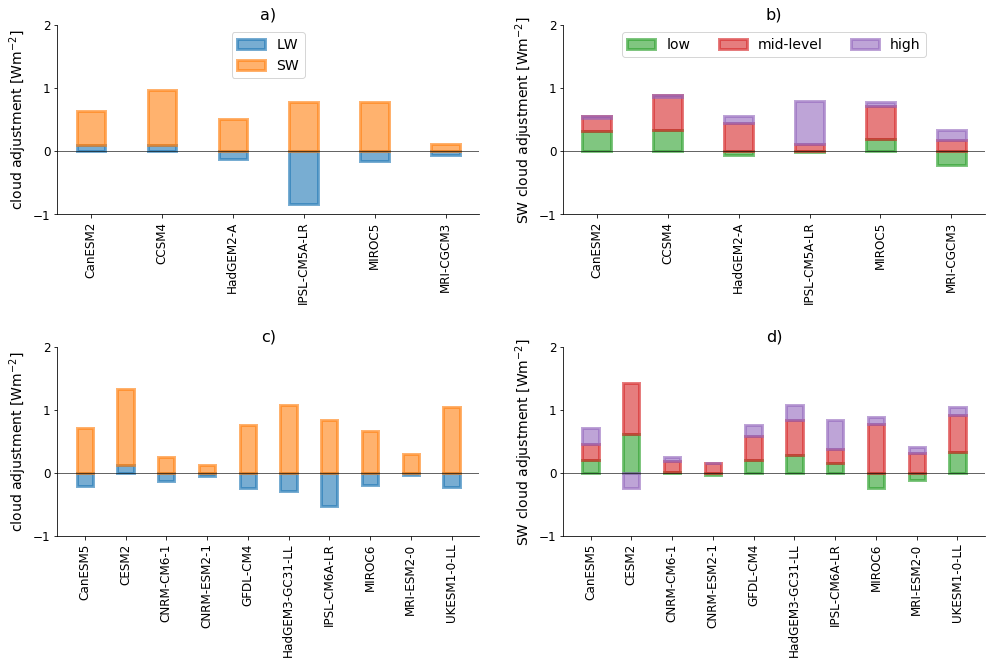

In [15]:
#colors to use:
a = 0 #blue
b = 2 #orange
c = 4 #green
d = 6 #red
e = 8 #purple

#model names
cmip5_mod = ["CanESM2", "CCSM4", "HadGEM2-A", "IPSL-CM5A-LR",  "MIROC5","MRI-CGCM3"]
cmip6_mod = ["CanESM5", "CESM2", "CNRM-CM6-1", "CNRM-ESM2-1", "GFDL-CM4", "HadGEM3-GC31-LL", "IPSL-CM6A-LR", "MIROC6", "MRI-ESM2-0", "UKESM1-0-LL"]


fig = plt.figure( figsize = (14, 10) )
fig.subplots_adjust(left = 0.05, hspace = 0.7, bottom = 0.17, right = 0.97)

ax = plt.subplot(2, 2, 3)
plt.title("c)", fontsize = 16)
x = np.arange(2., 22., 2.)
x2 = [2]
x3 = [4]
x4 = np.arange(6., 22., 2.)


plt.bar(x, gm_lw_adjustment_cmip6 / 2., facecolor = cs[a], lw = 3., edgecolor = cs[a], alpha = 0.6)
plt.bar(x2, gm_sw_adjustment_cmip6[0] / 2., facecolor = cs[b], lw = 3., edgecolor = cs[b], alpha = 0.6)
plt.bar(x3, gm_sw_adjustment_cmip6[1] / 2., bottom = gm_lw_adjustment_cmip6[1] / 2., facecolor = cs[b], lw = 3., edgecolor = cs[b], alpha = 0.6)
plt.bar(x4, gm_sw_adjustment_cmip6[2:] / 2., facecolor = cs[b], lw = 3., edgecolor = cs[b], alpha = 0.6)

plt.xticks(x, cmip6_mod, rotation = 90, fontsize = 12)

plt.ylabel("cloud adjustment [Wm$^{-2}$]", fontsize = 14)
plt.yticks([-1., 0., 1., 2.], fontsize = 12)

plt.axhline(y = 0, color = 'k', linewidth = 0.6)

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.ylim([-1., 2.])

ax = plt.subplot(2, 2, 4)
plt.title("d)", fontsize = 16)

plt.bar(x, gm_sw_low_adjustment_cmip6 / 2., facecolor = cs[c], lw = 3., edgecolor = cs[c], alpha = 0.6)
x2 = [2., 4., 6.]
x3 = [8.]
x4 = [10., 12.,14]
x5 = [16., 18.]
x6 = [20.]
x7 = [2]
x8 = [4]
x9 = [6]
x10 = [8]
x11 = [10, 12, 14]
x12 = [16, 18]
x13 = 20

plt.bar(x2, gm_sw_med_adjustment_cmip6[:3] / 2., bottom =  gm_sw_low_adjustment_cmip6[:3] / 2., facecolor = cs[d], lw = 3., edgecolor = cs[d], alpha = 0.6)
plt.bar(x7, gm_sw_high_adjustment_cmip6[0] / 2., bottom =  (gm_sw_low_adjustment_cmip6[0] + gm_sw_med_adjustment_cmip6[0]) / 2., facecolor = cs[e], lw = 3., edgecolor = cs[e], alpha = 0.6)


plt.bar(x3, gm_sw_med_adjustment_cmip6[3] / 2., facecolor = cs[d], lw = 3., edgecolor = cs[d], alpha = 0.6)
plt.bar(x4, gm_sw_med_adjustment_cmip6[4:7] / 2., bottom =  gm_sw_low_adjustment_cmip6[4:7] / 2., facecolor = cs[d], lw = 3., edgecolor = cs[d], alpha = 0.6)
plt.bar(x5, gm_sw_med_adjustment_cmip6[7:9] / 2., facecolor = cs[d], lw = 3., edgecolor = cs[d], alpha = 0.6)
plt.bar(x6, gm_sw_med_adjustment_cmip6[9] / 2., bottom =  gm_sw_low_adjustment_cmip6[9] / 2., facecolor = cs[d], lw = 3., edgecolor = cs[d], alpha = 0.6)

plt.bar(x8, gm_sw_high_adjustment_cmip6[1] / 2., facecolor = cs[e], lw = 3., edgecolor = cs[e], alpha = 0.6)
plt.bar(x9, gm_sw_high_adjustment_cmip6[2] / 2., bottom =  (gm_sw_low_adjustment_cmip6[2] + gm_sw_med_adjustment_cmip6[2]) / 2., facecolor = cs[e], lw = 3., edgecolor = cs[e], alpha = 0.6)
plt.bar(x10, gm_sw_high_adjustment_cmip6[3] / 2., bottom =  gm_sw_med_adjustment_cmip6[3] / 2., facecolor = cs[e], lw = 3., edgecolor = cs[e], alpha = 0.6)
plt.bar(x11, gm_sw_high_adjustment_cmip6[4:7] / 2., bottom =  (gm_sw_low_adjustment_cmip6[4:7] + gm_sw_med_adjustment_cmip6[4:7]) / 2., facecolor = cs[e], lw = 3., edgecolor = cs[e], alpha = 0.6)
plt.bar(x12, gm_sw_high_adjustment_cmip6[7:9] / 2., bottom =  gm_sw_med_adjustment_cmip6[7:9] / 2., facecolor = cs[e], lw = 3., edgecolor = cs[e], alpha = 0.6)
plt.bar(x13, gm_sw_high_adjustment_cmip6[9] / 2., bottom =  (gm_sw_low_adjustment_cmip6[9] + gm_sw_med_adjustment_cmip6[9]) / 2., facecolor = cs[e], lw = 3., edgecolor = cs[e], alpha = 0.6)

plt.xticks(x, cmip6_mod, rotation = 90, fontsize = 12)

plt.ylabel("SW cloud adjustment [Wm$^{-2}$]", fontsize = 14)
plt.yticks([-1., 0., 1., 2.], fontsize = 12)

plt.axhline(y = 0, color = 'k', linewidth = 0.6)

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')


ax = plt.subplot(2, 2, 1)
plt.title("a)", fontsize = 16)

x = np.arange(2., 14., 2)
x2 = [2., 4.]
x3 = np.arange(6., 14., 2)
plt.bar(x, gm_lw_adjustment_cmip5 / 2., facecolor = cs[a], lw = 3., edgecolor = cs[a], alpha = 0.6)
plt.bar(x2, gm_sw_adjustment_cmip5[:2] / 2., bottom = gm_lw_adjustment_cmip5[:2] / 2., facecolor = cs[b], lw = 3., edgecolor = cs[b], alpha = 0.6)
plt.bar(x3, gm_sw_adjustment_cmip5[2:] / 2., facecolor = cs[b], lw = 3., edgecolor = cs[b], alpha = 0.6)

plt.legend(["LW", "SW"], loc = "upper center", fontsize = 14)

x = np.arange(2., 14., 2)
plt.xticks(x, cmip5_mod, rotation = 90, fontsize = 12)

plt.ylabel("cloud adjustment [Wm$^{-2}$]", fontsize = 14)
plt.yticks([-1., 0., 1., 2.], fontsize = 12)

plt.axhline(y = 0, color = 'k', linewidth = 0.6)

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.ylim([-1., 2.])

ax = plt.subplot(2, 2, 2)
plt.title("b)", fontsize = 16)

plt.bar(x, gm_sw_low_adjustment_cmip5 / 2., facecolor = cs[c], lw = 3., edgecolor = cs[c], alpha = 0.6)
x2 = [2., 4.]
x3 = [6, 8.]
x4 = [10.]
x5 = [12.]
x6 = [20.]
x7 = [2]
x8 = [4]
x9 = [6]
x10 = [8]
x11 = [10, 12, 14]
x12 = [16, 18]
x13 = 20

plt.bar(x2, gm_sw_med_adjustment_cmip5[:2] / 2., bottom =  gm_sw_low_adjustment_cmip5[:2] / 2., facecolor = cs[d], lw = 3., edgecolor = cs[d], alpha = 0.6)
plt.bar(x2, gm_sw_high_adjustment_cmip5[:2] / 2., bottom = (gm_sw_low_adjustment_cmip5[:2] + gm_sw_med_adjustment_cmip5[:2])/ 2., facecolor = cs[e], lw = 3., edgecolor = cs[e], alpha = 0.6)

plt.bar(x3, gm_sw_med_adjustment_cmip5[2:4] / 2., facecolor = cs[d], lw = 3., edgecolor = cs[d], alpha = 0.6)
plt.bar(x4, gm_sw_med_adjustment_cmip5[4] / 2., bottom =  gm_sw_low_adjustment_cmip5[4] / 2., facecolor = cs[d], lw = 3., edgecolor = cs[d], alpha = 0.6)
plt.bar(x5, gm_sw_med_adjustment_cmip5[5] / 2., facecolor = cs[d], lw = 3., edgecolor = cs[d], alpha = 0.6)

plt.bar(x3, gm_sw_high_adjustment_cmip5[2:4] / 2.,bottom =  gm_sw_med_adjustment_cmip5[2:4] / 2., facecolor = cs[e], lw = 3., edgecolor = cs[e], alpha = 0.6)
plt.bar(x4, gm_sw_high_adjustment_cmip5[4] / 2., bottom =  (gm_sw_low_adjustment_cmip5[4] + gm_sw_med_adjustment_cmip5[4])/ 2., facecolor = cs[e], lw = 3., edgecolor = cs[e], alpha = 0.6)
plt.bar(x5, gm_sw_high_adjustment_cmip5[5] / 2., bottom =  gm_sw_med_adjustment_cmip5[5] / 2., facecolor = cs[e], lw = 3., edgecolor = cs[e], alpha = 0.6)

plt.xticks(x, cmip5_mod, rotation = 90, fontsize = 12)

plt.legend(["low", "mid-level", "high"], loc = "upper center", fontsize = 14, ncol = 3)


plt.ylabel("SW cloud adjustment [Wm$^{-2}$]", fontsize = 14)
plt.yticks([-1., 0., 1., 2.], fontsize = 12)

plt.axhline(y = 0, color = 'k', linewidth = 0.6)

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.savefig("cloud_adjustment_breakdown.png")
plt.savefig("cloud_adjustment_breakdown.pdf")

In [16]:
#Use the Scott et al adjustment
ncmip5_mod = ["CanESM2", "CCSM4", "HadGEM2-A", "IPSL-CM5A-LR",  "MIROC5","MRI-CGCM3"]
ncmip6_mod = ["CanESM5", "CESM2", "CNRM-CM6-1", "CNRM-ESM2-1", "GFDL-CM4", "HadGEM3-GC31-LL", "IPSL-CM6A-LR", "MIROC6", "MRI-ESM2-0", "UKESM1-0-LL"]

nm5 = len(ncmip5_mod)
nm6 = len(ncmip6_mod)

#Load cloud adjustment maps (calculated separately)
data = np.load("CMIP5_adjusted_low_cloud.npy")
cmip5_ca = data["u"][:]

data = np.load("CMIP6_adjusted_low_cloud.npy")
cmip6_ca = data["u"][:]

l1 = np.where( abs(lat) <= 60.)
gma = 2. * np.pi * (np.max(np.sin(rad_lats[l1])) - np.min(np.sin(rad_lats[l1])))
fact = 0.6377 #multiply by this since only taking 60S to 60N

CMIP5_low_net_adj = np.trapz(np.trapz(cmip5_ca[:, l1, :] * cos_lat[np.newaxis, l1,np.newaxis ], rad_lons, axis = 3), rad_lats[l1], axis = 2) / gma
CMIP6_low_net_adj = np.trapz(np.trapz(cmip6_ca[:, l1, :] * cos_lat[np.newaxis, l1,np.newaxis ], rad_lons, axis = 3), rad_lats[l1], axis = 2) / gma

#convert from 4x to 2x, account for limited area
CMIP5_low_net_adj = CMIP5_low_net_adj[:, 0]
CMIP6_low_net_adj = CMIP6_low_net_adj[:, 0]

CMIP5_low_net_adj /= 2. / fact
#Take out IPSL, which doesn't have CCF data available
test = np.zeros( 5)
test[:3] = CMIP5_low_net_adj[:3]
test[3:] = CMIP5_low_net_adj[4:]
CMIP5_low_net_adj = test[:]

CMIP6_low_net_adj /= 2. / fact
#Take out CNRM models and GFDL, which doesn't have CCF data available
test = np.zeros( 7)
test[:2] = CMIP6_low_net_adj[:2]
test[2:] = CMIP6_low_net_adj[5:]
CMIP6_low_net_adj = test[:]

In [17]:
#CCF results provided by Tim and Matt
ccf_lcadj5 = np.array([-0.12, -0.34, -0.45, 0.0, -0.41]) * fact
ccf_lcadj6 = np.array([-0.15, -0.58, -0.16, -0.56, -0.33, -0.54, -0.15]) * fact

ccf_eisadj5 = np.array([-0.02, -0.52, -0.56, -0.33, -0.59]) * fact
ccf_eisadj6 = np.array([-0.31, -0.77, -0.32, -0.76, -0.59, -0.84, -0.31]) * fact
errorsR_5 = np.array([0.17, 0.14, 0.13, 0.10, 0.13]) * fact
errorsE_5 = np.array([0.16, 0.13, 0.12, 0.10, 0.11]) * fact

errorsR_6 = np.array([0.08, 0.11, 0.06, 0.09, 0.07, 0.07, 0.06]) * fact
errorsE_6 = np.array([0.08, 0.1, 0.06, 0.08, 0.07, 0.07, 0.06]) * fact

errorsR_c = np.array([np.sqrt( 0.17 ** 2 + 0.08 ** 2), np.sqrt( 0.14 ** 2 + 0.11 ** 2), np.sqrt( 0.13 ** 2 + 0.06 ** 2), 
             np.sqrt( 0.1 ** 2 + 0.07 ** 2), np.sqrt( 0.13 ** 2 + 0.06 ** 2)]) * fact
errorsE_c = np.array([np.sqrt( 0.16 ** 2 + 0.08 ** 2), np.sqrt( 0.13 ** 2 + 0.1 ** 2), np.sqrt( 0.12 ** 2 + 0.06 ** 2), 
             np.sqrt( 0.1 ** 2 + 0.07 ** 2), np.sqrt( 0.11 ** 2 + 0.06 ** 2)]) * fact

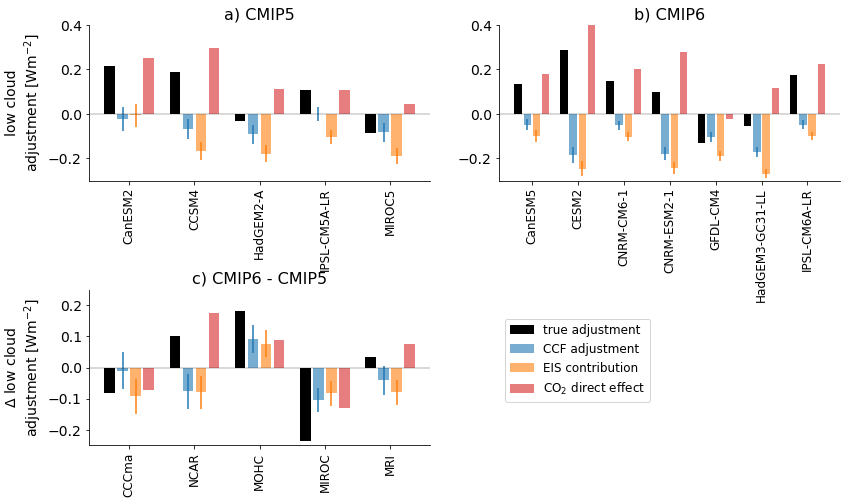

In [18]:
fig = plt.figure( figsize = (12, 8) )
fig.subplots_adjust(left = 0.1, hspace = 0.7, bottom = 0.15, right = 0.97)

ax = plt.subplot(2, 2, 1)
plt.title("a) CMIP5", fontsize = 16)

x = np.arange(1., 26., 5.)
x2 = np.arange(2., 27., 5.)
x3 = np.arange(3., 28., 5.)
x4 = np.arange(4., 29., 5.)

plt.bar(x, CMIP5_low_net_adj, color = 'k')
plt.bar(x2, np.array(ccf_lcadj5) / 2. * fact, color = cs[0], alpha = 0.6)
plt.errorbar(x2, np.array(ccf_lcadj5) / 2. * fact, yerr = np.array(errorsR_5) / 2., color = cs[0], linestyle = "None")
plt.bar(x3, np.array(ccf_eisadj5) / 2., color = cs[2], alpha = 0.6)
plt.errorbar(x3, np.array(ccf_eisadj5) / 2., yerr = np.array(errorsE_5) / 2., color = cs[2], linestyle = "None")

plt.bar(x4, (CMIP5_low_net_adj-np.array(ccf_lcadj5) / 2.), color = cs[6], alpha = 0.6)

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

x = np.arange(2.5, 27.5, 5.)
plt.xticks(x, ncmip5_mod, fontsize = 12, rotation = 90)

plt.axhline(y = 0, color = 'k', linewidth = 0.3)

plt.ylim([-0.3, 0.4])
plt.yticks([-0.2, 0.,  0.2, 0.4], fontsize = 14)
plt.ylabel("low cloud\nadjustment [Wm$^{-2}$]", fontsize = 14)

ax = plt.subplot(2, 2, 2)
plt.title("b) CMIP6", fontsize = 16)

x = np.arange(1., 36., 5.)
x2 = np.arange(2., 37., 5.)
x3 = np.arange(3., 38., 5.)
x4 = np.arange(4., 39., 5.)

plt.bar(x, CMIP6_low_net_adj, color = 'k')
plt.bar(x2, np.array(ccf_lcadj6) / 2., facecolor = cs[0], alpha = 0.6, color = cs[0])
plt.bar(x3, np.array(ccf_eisadj6) / 2., facecolor = cs[2], alpha = 0.6, color = cs[2])
plt.bar(x4, (CMIP6_low_net_adj-np.array(ccf_lcadj6) / 2.), color = cs[6], alpha = 0.6)
plt.errorbar(x2, np.array(ccf_lcadj6) / 2., yerr = np.array(errorsR_6) / 2., color = cs[0], linestyle = "None")
plt.errorbar(x3, np.array(ccf_eisadj6) / 2., yerr = np.array(errorsE_6) / 2., color = cs[2], linestyle = "None")


ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

x = np.arange(2.5, 37.5, 5.)
plt.xticks(x, ncmip6_mod, fontsize = 12, rotation = 90)

plt.ylim([-0.3, 0.4])
plt.yticks([-0.2, 0.,  0.2, 0.4], fontsize = 14)

plt.axhline(y = 0, color = 'k', linewidth = 0.3)

centers = ["CCCma", "NCAR", "MOHC", "MIROC", "MRI"]
ax = plt.subplot(2, 2, 3)
plt.title("c) CMIP6 - CMIP5", fontsize = 16)

x = np.arange(1., 26., 5.)
x2 = np.arange(2., 27., 5.)
x3 = np.arange(3., 28., 5.)
x4 = np.arange(4., 29., 5.)

plt.bar(x[:3], (CMIP6_low_net_adj[:3] - CMIP5_low_net_adj[:3]), color = 'k')
plt.bar(x2[:3], (np.array(ccf_lcadj6[:3]) - np.array(ccf_lcadj5[:3])) / 2., color = cs[0], alpha = 0.6)
plt.bar(x3[:3], (np.array(ccf_eisadj6[:3]) - np.array(ccf_eisadj5[:3])) / 2., color = cs[2], alpha = 0.6)
plt.bar(x4[:3], ((CMIP6_low_net_adj-np.array(ccf_lcadj6) / 2.)[:3] - (CMIP5_low_net_adj-np.array(ccf_lcadj5) / 2.)[:3]), color = cs[6], alpha = 0.6)
plt.errorbar(x2[:3], (np.array(ccf_lcadj6[:3]) - np.array(ccf_lcadj5[:3])) / 2., yerr = np.array(errorsR_c[:3]) / 2., color = cs[0], linestyle = "None")
plt.errorbar(x3[:3], (np.array(ccf_eisadj6[:3]) - np.array(ccf_eisadj5[:3])) / 2., yerr = np.array(errorsE_c[:3]) / 2., color = cs[2], linestyle = "None")


plt.bar(x[3:], (CMIP6_low_net_adj[4:6] - CMIP5_low_net_adj[3:5]), color = 'k')
plt.bar(x2[3:], (np.array(ccf_lcadj6[4:6]) - np.array(ccf_lcadj5[3:])) / 2., color = cs[0], alpha = 0.6)
plt.bar(x3[3:], (np.array(ccf_eisadj6[4:6]) - np.array(ccf_eisadj5[3:])) / 2., color = cs[2], alpha = 0.6)
plt.bar(x4[3:], ((CMIP6_low_net_adj-np.array(ccf_lcadj6) / 2.)[4:6] - (CMIP5_low_net_adj-np.array(ccf_lcadj5) / 2.)[3:5]), color = cs[6], alpha = 0.6)
plt.errorbar(x2[3:], (np.array(ccf_lcadj6[4:6]) - np.array(ccf_lcadj5[3:])) / 2., yerr = np.array(errorsR_c[3:]) / 2., color = cs[0], linestyle = "None")
plt.errorbar(x3[3:], (np.array(ccf_eisadj6[4:6]) - np.array(ccf_eisadj5[3:])) / 2., yerr = np.array(errorsE_c[3:]) / 2., color = cs[2], linestyle = "None")

plt.legend(["true adjustment", "CCF adjustment", "EIS contribution", "CO$_2$ direct effect"], ncol = 1, fontsize = 12, bbox_to_anchor = (1.2, 0.85))

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

x = np.arange(2.5, 27.5, 5.)
plt.xticks(x, centers, fontsize = 12, rotation = 90)
plt.yticks([-0.2, -0.1, 0., 0.1, 0.2], fontsize = 14)

plt.axhline(y = 0, color = 'k', linewidth = 0.3)

plt.ylim([-0.25, 0.25])
plt.ylabel("$\Delta$ low cloud\nadjustment [Wm$^{-2}$]", fontsize = 14)

plt.savefig("CCF_analysis.png")
plt.savefig("CCF_analysis.pdf")

First plot illustrating forcing issues with CESM2

In [ ]:
#Data are not included in the repository, but hopefully self-explanatory
ds1 = xr.open_dataset(direc + "RFMIP-ERF/tas_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc")
ds2 = xr.open_dataset(direc + "RFMIP-ERF/rsut_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc")
ds3 = xr.open_dataset(direc + "RFMIP-ERF/rlut_Amon_CESM2_abrupt-4xCO2_r1i1p1f1_gn_000101-015012.nc")
ds4 = xr.open_dataset(direc + "RFMIP-ERF/rsut_Amon_CESM2_piControl_r1i1p1f1_gn_000101-009912.nc")
ds5 = xr.open_dataset(direc + "RFMIP-ERF/rlut_Amon_CESM2_piControl_r1i1p1f1_gn_000101-009912.nc")
ds6 = xr.open_dataset(direc + "RFMIP-ERF/tas_Amon_CESM2_piControl_r1i1p1f1_gn_000101-015012.nc")

lats = ds1.lat[:] * np.pi / 180.
lons = ds1.lon[:] * np.pi / 180.

cos_lat = np.cos(lats)

In [ ]:
tas = 1. / 4. / np.pi * np.trapz( np.trapz(ds1.tas * cos_lat, lons, axis = 2), lats, axis  = 1)
tas -= np.mean(1. / 4. / np.pi * np.trapz( np.trapz(ds6.tas * cos_lat, lons, axis = 2), lats, axis  = 1), axis = 0)

R = 1. / 4. / np.pi * np.trapz( np.trapz((ds2.rsut + ds3.rlut) * cos_lat, lons, axis = 2), lats, axis  = 1)
#Since this is quick and dirty, don't worry about detrending
R -= np.mean(1. / 4. / np.pi * np.trapz( np.trapz((ds4.rsut + ds5.rlut) * cos_lat, lons, axis = 2), lats, axis  = 1), axis = 0)

In [ ]:
#Convert to annual-mean
d1 = len(tas)
yr_tas = np.zeros( d1 // 12)
yr_R = np.zeros(  d1 // 12)

for i in range( d1 // 12):
    yr_tas[i] = np.mean(tas[i * 12:(i + 1) * 12], axis = 0)
    yr_R[i] = np.mean(R[i * 12:(i + 1) * 12], axis = 0)

In [1]:
import scipy.stats as ss

cs = [(31 / 255., 119 / 255., 180 / 255.), (44. / 255., 160 / 255., 44 / 255.), (214 / 255., 39 / 255., 40 / 255.), (255 / 255., 127 / 255., 14 / 255.) ]

slope_140, inter_140 = ss.linregress(yr_tas, -yr_R)[:2]
slope_10, inter_10 = ss.linregress(yr_tas[:10], -yr_R[:10])[:2]
slope_20, inter_20 = ss.linregress(yr_tas[:20], -yr_R[:20])[:2]
fix_SST = 8.9 #from table


fig = plt.figure( figsize = (10, 4) )
plt.subplots_adjust(left = 0.1, right = 0.85, bottom = 0.16, top = 0.9, wspace = 0.35, hspace = 0.5)

ax = plt.subplot(1, 2, 1)
plt.title("a) CESM2", fontsize = 16)

x = np.linspace(0., 12.)
plt.plot( x, inter_140 + slope_140 * x, 'k-')
plt.plot( x, inter_20 + slope_20 * x, 'k--')
plt.plot( x, inter_10 + slope_10 * x, 'k:')
plt.plot( 0.5, fix_SST, 'x', markeredgecolor = cs[2], markersize = 10)

plt.legend(["$F_{1-150}$", "$F_{1-20}$", "$F_{1-10}$", "$F_{fix}$"], frameon = False, loc = "upper right", fontsize = 14)


plt.plot(yr_tas, -yr_R, 'o', markersize = 6, markerfacecolor = 'None', markeredgecolor = cs[0])


ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.xticks(fontsize = 14)
plt.yticks([0., 2., 4., 6., 8., 10.], fontsize = 14)

plt.xlabel("T [K]", fontsize = 16)
plt.ylabel("R [Wm$^{-2}$]", fontsize = 16)

plt.ylim([0., 10.])
plt.xlim([0., 11.])

#Took these from above
corrs_cmip5 = [0.88, .84, 0.83]
corrs_cmip6 = [0.58, 0.08, 0.35]
corrs_cmip62 = [0.58, 0.08, 0.55]


ax = plt.subplot(1, 2, 2)
plt.title("b)", fontsize = 16)

x = [1, 2, 3]
x2 = [1.25, 2.25, 3.25]

plt.bar( x, corrs_cmip5, width = 0.25)
plt.bar( x2, corrs_cmip6, width = 0.25)

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.spines['bottom'].set_color('none')
plt.axhline(y = 0, color = 'k', linewidth = 0.5)

plt.bar( 3.25, 0.56, width = 0.25, alpha = 0.4, facecolor = 'None', edgecolor = 'orange', linewidth = 2.)

plt.ylim([-0.3, 1.])
plt.xlim([0.5, 4.])

plt.ylabel("r", fontsize = 16)
plt.yticks(fontsize = 14)

ax.axes.xaxis.set_visible(False)
plt.text(0.6, 0.1, "corr($F_{1-150},F_{1-20}$)", rotation = 90, fontsize = 14)
plt.text(1.6, 0.1, "corr($F_{1-150},F_{fix}$)", rotation = 90, fontsize = 14)
plt.text(2.6, 0.1, "corr($F_{1-20},F_{fix}$)", rotation = 90, fontsize = 14)

plt.text(.9, 0.1, "CMIP5", rotation = 90, fontsize = 14)
plt.text(1.15, 0.1, "CMIP6", rotation = 90, fontsize = 14)

plt.annotate("w/out CNRM-ESM2.1", (3.35, 0.57), (3.5, 0.7), fontsize = 12,  arrowprops=dict(arrowstyle='->'))

plt.savefig("CESM2_example.png")
plt.savefig("CESM2_example.pdf")

NameError: name 'yr_tas' is not defined